## TP Kaggle : Cover Type Prediction of Forests

### Description 

In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

### Data

Name Data Type Measurement Description :  
- Elevation quantitative meters Elevation in meters  
- Aspect quantitative azimuth Aspect in degrees azimuth  
- Slope quantitative degrees Slope in degrees  
- Horizontal_Distance_To_Hydrology quantitative meters Horz Dist to nearest surface water features  
- Vertical_Distance_To_Hydrology quantitative meters Vert Dist to nearest surface water features  
- Horizontal_Distance_To_Roadways quantitative meters Horz Dist to nearest roadway  
- Hillshade_9am quantitative 0 to 255 index Hillshade index at 9am, summer solstice  
- Hillshade_Noon quantitative 0 to 255 index Hillshade index at noon, summer soltice  
- Hillshade_3pm quantitative 0 to 255 index Hillshade index at 3pm, summer solstice  
- Horizontal_Distance_To_Fire_Points quantitative meters Horz Dist to nearest wildfire ignition points  
- Wilderness_Area (4 binary columns) qualitative 0 (absence) or 1 (presence) Wilderness area designation  
- Soil_Type (40 binary columns) qualitative 0 (absence) or 1 (presence) Soil Type designation  
- Cover_Type (7 types) integer 1 to 7 Forest Cover Type designation

Forest Cover Type Classes :  
- Spruce/Fir  
- Lodgepole Pine  
- Ponderosa Pine  
- Cottonwood/Willow  
- Aspen  
- Douglas-fir  
- Krummholz

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

### Get Train Data

In [2]:
path = "/Users/valentinphetchanpheng/Documents/MS BGD Telecom ParisTech/Bifet/Hadoop:Spark:Data Mining/all/"
train_data = pd.read_csv(path + "train-set.csv")
train_data = train_data.set_index('Id')
train_data.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2611,326,20,120,27,1597,168,214,184,2913,...,0,0,0,0,0,0,0,0,0,6
2,2772,324,17,42,7,1814,175,220,183,2879,...,0,0,0,0,0,0,0,0,0,2
3,2764,4,14,480,-21,700,201,212,148,700,...,0,0,0,0,0,0,0,0,0,2
4,3032,342,9,60,8,4050,202,227,164,2376,...,0,0,0,0,0,0,0,0,0,2
5,2488,23,11,117,21,1117,209,218,151,1136,...,0,0,0,0,0,0,0,0,0,2
6,2968,83,8,390,19,4253,232,226,127,4570,...,0,0,0,0,0,0,0,0,0,2
7,3027,11,6,534,47,1248,214,228,151,2388,...,0,0,0,0,0,0,0,0,0,2
8,3216,277,9,67,23,5430,212,236,169,2373,...,0,0,0,0,0,0,0,0,0,1
9,3242,262,5,849,169,1672,207,242,173,691,...,0,0,0,0,0,0,0,0,0,1


### Test Data

In [3]:
test_data = pd.read_csv(path + "test-set.csv")
test_data = test_data.set_index('Id')
test_data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
528721,2953,224,9,55,11,1600,206,251,176,1669,...,0,1,0,0,0,0,0,0,0,0
528722,2977,233,14,42,1,1282,196,252,192,277,...,0,0,0,0,0,0,0,0,0,0
528723,3055,227,9,120,5,2724,207,249,178,908,...,0,0,0,0,0,0,0,0,0,0
528724,2615,107,13,277,74,967,241,224,110,3545,...,0,0,0,0,0,0,0,0,0,0
528725,3033,59,15,457,94,4086,233,213,99,4974,...,0,0,0,0,0,0,0,0,0,0


### Features "X" & Cover Type "Y" matrix

We define the matrix of features called "features" and the vector of class label called "cover_type".  

We get the features matrix "X" by dropping the last column 'Cover Type' of the train & test data which corresponds to the label "Y".

In [4]:
features = train_data.drop(['Cover_Type'], axis=1)
print('Dimension matrice features :', features.shape)

Dimension matrice features : (528720, 54)


In [5]:
cover_type = train_data['Cover_Type']
print('Dimension matrice Cover Type :', cover_type.shape)

Dimension matrice Cover Type : (528720,)


In [6]:
features.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,...,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000
mean,2959.800552,155.629891,14.095043,269.731845,46.474718,2352.595141,212.153062,223.343970,142.555615,1979.363977,...,0.043859,0.090365,0.077678,0.002792,0.003276,0.000202,0.000471,0.026916,0.023646,0.015118
std,280.351766,112.095470,7.501853,213.069124,58.433933,1563.557679,26.793767,19.813479,38.336178,1325.877589,...,0.204781,0.286705,0.267665,0.052762,0.057141,0.014224,0.021696,0.161838,0.151943,0.122021
min,1759.000000,-72.000000,-3.000000,-144.000000,-182.000000,-805.000000,-2.000000,0.000000,-17.000000,-704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,223.000000,30.000000,2001.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,387.000000,69.000000,3333.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3957.000000,440.000000,65.000000,1397.000000,601.000000,7577.000000,268.000000,266.000000,259.000000,7548.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Through the describe() method, we can say that the features are not standardized since the mean and standard deviation are not equal to 0 and 1 respectively.

### Check type of features

In [7]:
print(features.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

### Features Distribution

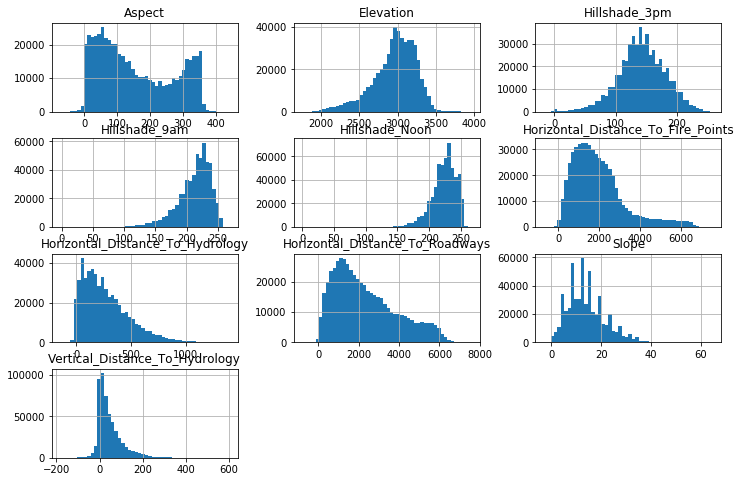

In [8]:
features.iloc[:,:10].hist(figsize=(12,8), bins=50) 
plt.show() 

### Data Cleaning / Features Selection

In this part, we propose a frequency method for features selection.
We look at and count the number of observations for each 'Soil Type', in other words we take a look at the frequency of each 'Soil Type' variables.
Then we drop features that are non significant for the study ie with a frequency below a threshold value we define.  

Since we have 528 720 observations, we delete 'Soil Type' features that have a frequency lower than 0.1 %.  
So we delete features where the number of positive observations (ie =1) of a 'Soil Type' is lower than 500 (because 500/500 000 ≈ 0.001).

In [9]:
# Number/Count of a Soil Type (ie Soil Type = 1)
train_data.groupby('Soil_Type6').size()
train_data['Soil_Type6'].value_counts()

0    522725
1      5995
Name: Soil_Type6, dtype: int64

#### Frequency Method

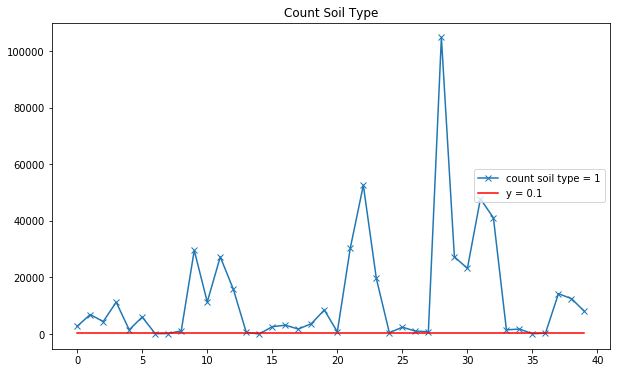

In [10]:
# List of the number/count for each Soil Type
index = range(0,40)
const = 500*np.ones(40)
freq_soil_type = []

for k in range(1,41):
    freq_soil_type.append(train_data['Soil_Type' + str(k)].value_counts()[1])

# Graph
fig1 = plt.figure(figsize=(10, 6))
plt.plot(index, freq_soil_type, '-x', label ='count soil type = 1')
plt.plot(index,const,color = "red" , label='y = 0.1')
plt.legend(loc=7)
plt.title('Count Soil Type')
plt.show()

In [11]:
# Selection of features when number of a certain Soil Type < 500
list_var = []
for f in freq_soil_type:
    if f < 500:
        list_var.append(freq_soil_type.index(f)+1)
        
print('Non significant variables :', list_var)

Non significant variables : [7, 8, 15, 25, 36, 37]


We will drop the Soil Type 7, 8, 15, 25, 36 and 37 variables.  

In addition, we take a look at the 10 least important features. 

#### Features Importance Method

In [12]:
X_sample, _, y_sample, _ = train_test_split(features.values,
                                            cover_type.values.ravel(),
                                            test_size=0.7)

rf_sample = RandomForestClassifier(n_estimators=100, bootstrap=True)
rf_sample.fit(X_sample, y_sample.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
def importances_toplast10(estimator, col_array, title):
    importances = estimator.feature_importances_ 
    indices = np.argsort(importances)[::1]
    print("%s Top last 10 Important Features\n" %title) 
    for f in range(10): 
        print("%d. %s (%f)" % (f + 1, col_array.columns[indices[f]], importances[indices[f]])) 
    #Mean Feature Importance 
    print("\nMean Features importances %.6f" %np.mean(importances))
    #Plot the feature importances of the algorithm
    indices = indices[:10] 
    plt.figure() 
    plt.title(title+" Top last 10 Rank Feature importances") 
    plt.bar(range(10), importances[indices], color="gr", align="center") 
    plt.xticks(range(10), col_array.columns[indices], fontsize=14, rotation=90) 
    plt.xlim([-1, 10]) 
    plt.show()

Cover Type (RF) Top last 10 Important Features

1. Soil_Type15 (0.000004)
2. Soil_Type7 (0.000008)
3. Soil_Type8 (0.000045)
4. Soil_Type36 (0.000065)
5. Soil_Type9 (0.000119)
6. Soil_Type28 (0.000148)
7. Soil_Type25 (0.000189)
8. Soil_Type18 (0.000238)
9. Soil_Type14 (0.000394)
10. Soil_Type26 (0.000405)

Mean Features importances 0.018519


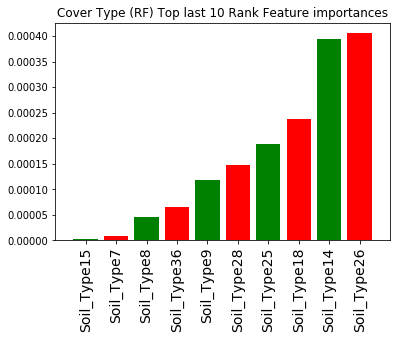

In [14]:
importances_toplast10(rf_sample, train_data, "Cover Type (RF)")

We can see that the 10 least important features are : Soil Type 15, 7, 8, 36, 9, 28, 25, 18, 26 and 14

We have 6 common non significant features with this method and the frequency method above : 
Soil Type 7, 8, 15, 25 and 36. 

Conclusion : We decide to remove Soil Type 7, 8, 9, 15, 25, 28, 36 and 37 variables.

In [15]:
# Dropping non significant features
features = features.drop(['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15', 'Soil_Type25', 'Soil_Type28','Soil_Type36', 'Soil_Type37'], axis=1)
test_data = test_data.drop(['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36', 'Soil_Type37'], axis=1)

### Features Engineering / Adding some features

In [16]:
#Elevation adjusted by Horizontal distance to Hyrdrology 
features['Elev_to_HD_Hyd']= features.Elevation - 0.2 * features.Horizontal_Distance_To_Hydrology 
test_data['Elev_to_HD_Hyd']= test_data.Elevation - 0.2 * test_data.Horizontal_Distance_To_Hydrology 

#Elevation adjusted by Vertical distance to Roadways 
features['Elev_to_VD_Hyd']= features.Elevation - features.Vertical_Distance_To_Hydrology 
test_data['Elev_to_VD_Hyd']= test_data.Elevation - test_data.Vertical_Distance_To_Hydrology 

#Elevation adjusted by Horizontal distance to Roadways 
features['Elev_to_HD_Road']=features.Elevation - 0.05 * features.Horizontal_Distance_To_Roadways 
test_data['Elev_to_HD_Road']=test_data.Elevation - 0.05 * test_data.Horizontal_Distance_To_Roadways 

#Mean distance to Amenities 
features['Mean_Amenities']=(features.Horizontal_Distance_To_Fire_Points + 
                            features.Horizontal_Distance_To_Hydrology + 
                            features.Horizontal_Distance_To_Roadways) / 3 

test_data['Mean_Amenities']=(test_data.Horizontal_Distance_To_Fire_Points + 
                             test_data.Horizontal_Distance_To_Hydrology + 
                             test_data.Horizontal_Distance_To_Roadways) / 3

#Mean Distance to Fire and Water 
features['Mean_Fire_Hyd']=(features.Horizontal_Distance_To_Fire_Points + features.Horizontal_Distance_To_Hydrology) / 2 
test_data['Mean_Fire_Hyd']=(test_data.Horizontal_Distance_To_Fire_Points + test_data.Horizontal_Distance_To_Hydrology) / 2

# Combination between Horizontal Distance to hydrology and Horizontal Distance to Fire Points
features['HDTH_HDTFP'] = features.Horizontal_Distance_To_Hydrology - features.Horizontal_Distance_To_Fire_Points
test_data['HDTH_HDTFP'] = test_data.Horizontal_Distance_To_Hydrology - test_data.Horizontal_Distance_To_Fire_Points

features['HDTFP_HDTH'] = features.Horizontal_Distance_To_Hydrology + features.Horizontal_Distance_To_Fire_Points
test_data['HDTFP_HDTH'] = test_data.Horizontal_Distance_To_Hydrology + test_data.Horizontal_Distance_To_Fire_Points

# Combination between Horizontal Distance to hydrology and Horizontal Distance to Roadways
features['HDTH_HDTR'] = features.Horizontal_Distance_To_Hydrology - features.Horizontal_Distance_To_Roadways
test_data['HDTH_HDTFR'] = test_data.Horizontal_Distance_To_Hydrology - test_data.Horizontal_Distance_To_Roadways

features['HDTFR_HDTH'] = features.Horizontal_Distance_To_Hydrology + features.Horizontal_Distance_To_Roadways
test_data['HDTFR_HDTH'] = test_data.Horizontal_Distance_To_Hydrology + test_data.Horizontal_Distance_To_Roadways

# Combination between Horizontal Distance to Fire Points and Horizontal Distance to Roadways
features['HDTFP_HDTR'] = features.Horizontal_Distance_To_Fire_Points - features.Horizontal_Distance_To_Roadways
test_data['HDTFP_HDTR'] = test_data.Horizontal_Distance_To_Fire_Points - test_data.Horizontal_Distance_To_Roadways

features['HDTR_HDTFP'] = features.Horizontal_Distance_To_Fire_Points + features.Horizontal_Distance_To_Roadways
test_data['HDTR_HDTFP'] = test_data.Horizontal_Distance_To_Fire_Points +  test_data.Horizontal_Distance_To_Roadways

# Euclidian Distance between Horizontal Distance to Hydrology and Horizontal Distance to Hydrology
features['Euclidian'] = np.linalg.norm(features.Horizontal_Distance_To_Hydrology-features.Vertical_Distance_To_Hydrology)
test_data['Euclidian'] = np.linalg.norm(test_data.Horizontal_Distance_To_Hydrology-test_data.Vertical_Distance_To_Hydrology)

### Splitting Data / Training and test set

We split our data into a training (80%) and test (20%) set.

In [17]:
features_train, features_test, cover_type_train, cover_type_test = train_test_split(features, cover_type, test_size=0.2, random_state=500)
print('Taille features train :', features_train.shape)
print('Taille cover type test :', cover_type_test.shape)

Taille features train : (422976, 50)
Taille cover type test : (105744,)


### Random Forest Algorithm

We have a classification problem.  
  
For this problem, we choose to use the Random Forest algorithm.  
  
Let's fit a Random Forest Classifier to our dataset. 

In [18]:
# Random Forest Algorithm
# We train our model on the train set
rf = RandomForestClassifier(max_depth=175, n_estimators = 200, max_features = 0.5, min_samples_leaf = 1, criterion = 'entropy', bootstrap = True, oob_score = True)
rf.fit(features_train, cover_type_train)
cover_type_pred_rf = rf.predict(features_test)

In [19]:
print(cover_type_pred_rf)

[7 6 1 ... 1 2 2]


In [20]:
from sklearn.metrics import accuracy_score
result_rf = accuracy_score(cover_type_test, cover_type_pred_rf)*100
print("Accuracy of Random Forest Model : %.2f%% " % result_rf)

Accuracy of Random Forest Model : 95.09% 


In [ ]:
# Predict on the test set
cover_type_pred = rf.predict(test_data)
print(cover_type_pred)

In [ ]:
# Export result into csv file
df = pd.DataFrame(cover_type_pred, columns =["Id"])
id_test = pd.DataFrame(test_data.index.values)
results = pd.concat([id_test, df],axis=1)
results.columns = ['Id', 'Cover_Type']
results.to_csv("tp350.csv",index=False)